<a href="https://colab.research.google.com/github/Dhanush0R/Graduate-Admission-Prediction/blob/master/Graduate_Admission_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`Graduate Admission Prediction`**

In [ ]:
# dataset = 'https://www.kaggle.com/datasets/mohansacharya/graduate-admissions'

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mohansacharya/graduate-admissions

  0% 0.00/9.64k [00:00<?, ?B/s]
100% 9.64k/9.64k [00:00<00:00, 21.0MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/graduate-admissions.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Admission_Predict_Ver1.1.csv")

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(500, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.drop(columns=['Serial No.'], inplace=True)

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
x= df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [ ]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [ ]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
X_train


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


from matplotlib import pyplot as plt
X_train['GRE Score'].plot(kind='hist', bins=20, title='GRE Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train['TOEFL Score'].plot(kind='hist', bins=20, title='TOEFL Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train['University Rating'].plot(kind='hist', bins=20, title='University Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train['SOP'].plot(kind='hist', bins=20, title='SOP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x='GRE Score', y='TOEFL Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x='TOEFL Score', y='University Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x='University Rating', y='SOP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x='SOP', y='LOR ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train['GRE Score'].plot(kind='line', figsize=(8, 4), title='GRE Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_train['TOEFL Score'].plot(kind='line', figsize=(8, 4), title='TOEFL Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_train['University Rating'].plot(kind='line', figsize=(8, 4), title='University Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_train['SOP'].plot(kind='line', figsize=(8, 4), title='SOP')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [ ]:
x_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model= Sequential([
    Dense(units=7, activation='relu', input_dim=7),
    Dense(units=7, activation='relu'),
    Dense(units=1, activation='linear')
])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 7)                 56        
                                                                 
 dense_13 (Dense)            (None, 7)                 56        
                                                                 
 dense_14 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.losses import mean_squared_error
model.compile(loss='mean_squared_error', optimizer="Adam")

In [ ]:
history = model.fit(x_train_scaled, Y_train, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 42ms/step - loss: 2.3409 - val_loss: 2.0167
Epoch 2/100
10/10 [==============================] - 0s 12ms/step - loss: 1.5316 - val_loss: 1.3372
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 1.0360 - val_loss: 0.9481
Epoch 4/100
10/10 [==============================] - 0s 13ms/step - loss: 0.7501 - val_loss: 0.7226
Epoch 5/100
10/10 [==============================] - 0s 12ms/step - loss: 0.5858 - val_loss: 0.5836
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4749 - val_loss: 0.4760
Epoch 7/100
10/10 [==============================] - 0s 12ms/step - loss: 0.3847 - val_loss: 0.3871
Epoch 8/100
10/10 [==============================] - 0s 13ms/step - loss: 0.3120 - val_loss: 0.3113
Epoch 9/100
10/10 [==============================] - 0s 13ms/step - loss: 0.2507 - val_loss: 0.2496
Epoch 10/100
10/10 [==============================] - 0s 11ms/step - loss: 0.2008 - val_loss: 0.1999

In [ ]:
y_pred = model.predict(x_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred)

0.7377015377952668

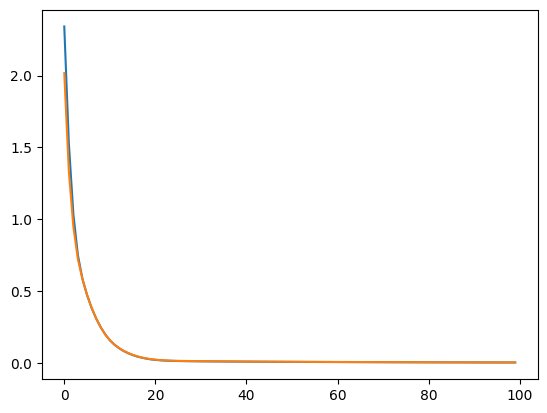

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])